# Productionisation of Machine Learning Models (Model Serialization)

## Concrete Strength Prediction

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Reading the dataset

In [3]:
concrete = pd.read_csv("Concrete_Data.csv")

## shape

In [4]:
concrete.shape

(1030, 9)

In [5]:
concrete.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [7]:
concrete.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


## Checking duplicates

In [8]:
concrete.duplicated().sum()

25

### dropping duplicates

In [9]:
concrete = concrete.drop_duplicates()

In [10]:
concrete.shape

(1005, 9)

## Checking null values

In [11]:
concrete.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

### Observation
* There are no null values present

# Univariate analysis

## cement

In [12]:
np.mean(concrete["Cement (component 1)(kg in a m^3 mixture)"])

278.6313432835818

<AxesSubplot:xlabel='Cement (component 1)(kg in a m^3 mixture)', ylabel='Density'>

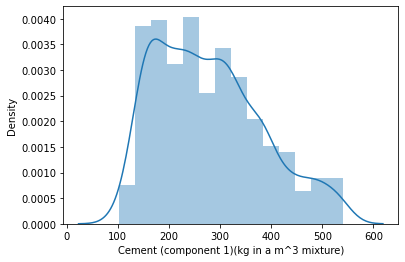

In [13]:
sns.distplot(concrete["Cement (component 1)(kg in a m^3 mixture)"])

### Observations
* cement column showing normal distribution with very slight right skewness.

<AxesSubplot:xlabel='Cement (component 1)(kg in a m^3 mixture)'>

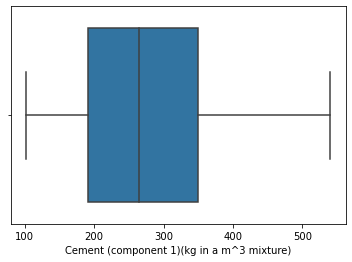

In [14]:
sns.boxplot(concrete["Cement (component 1)(kg in a m^3 mixture)"])

### Observations
* cement column not showing any outliers.

## Blast Furnace Slag

<AxesSubplot:xlabel='Blast Furnace Slag (component 2)(kg in a m^3 mixture)', ylabel='Density'>

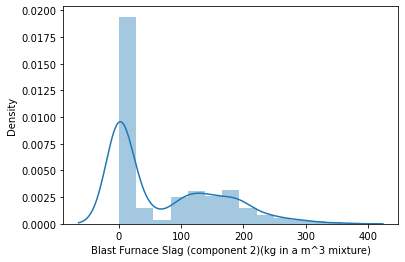

In [15]:
sns.distplot(concrete["Blast Furnace Slag (component 2)(kg in a m^3 mixture)"])

### Observations
* Not showing normal distribution and highly skewed towards right side.  

<AxesSubplot:xlabel='Blast Furnace Slag (component 2)(kg in a m^3 mixture)'>

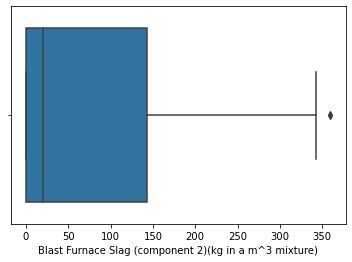

In [16]:
sns.boxplot(concrete["Blast Furnace Slag (component 2)(kg in a m^3 mixture)"])

### Observations
* Rightly skewed and outliers present in the right side.

## Fly Ash

<AxesSubplot:xlabel='Fly Ash (component 3)(kg in a m^3 mixture)', ylabel='Density'>

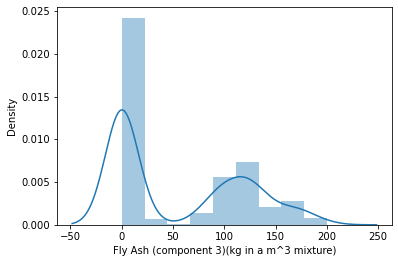

In [17]:
sns.distplot(concrete["Fly Ash (component 3)(kg in a m^3 mixture)"])

### Observations
* Not showing normal distribution and highly skewed right side.

<AxesSubplot:xlabel='Fly Ash (component 3)(kg in a m^3 mixture)'>

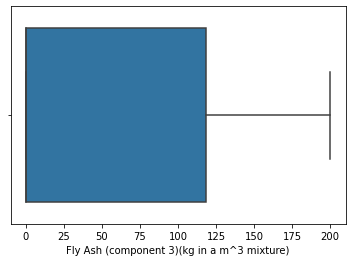

In [18]:
sns.boxplot(concrete["Fly Ash (component 3)(kg in a m^3 mixture)"])

### Observations
* Rightly skewed and no outliers present.

## Water

<AxesSubplot:xlabel='Water  (component 4)(kg in a m^3 mixture)', ylabel='Density'>

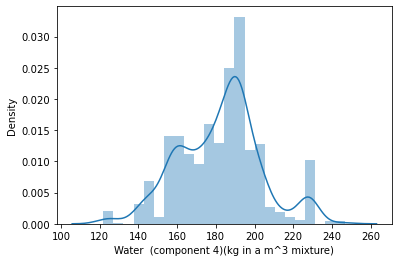

In [19]:
sns.distplot(concrete["Water  (component 4)(kg in a m^3 mixture)"])

### Observations
* showing slight normal distribution and concentrated towards the mean.

<AxesSubplot:xlabel='Water  (component 4)(kg in a m^3 mixture)'>

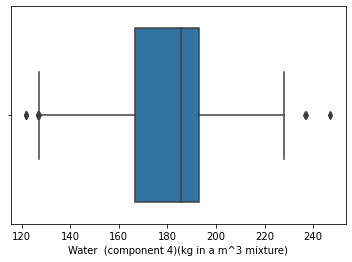

In [20]:
sns.boxplot(concrete["Water  (component 4)(kg in a m^3 mixture)"])

### Observations
* Outliers are present in the data. Both low side and high side outliers are present.

## Superplasticizer 

<AxesSubplot:xlabel='Superplasticizer (component 5)(kg in a m^3 mixture)', ylabel='Density'>

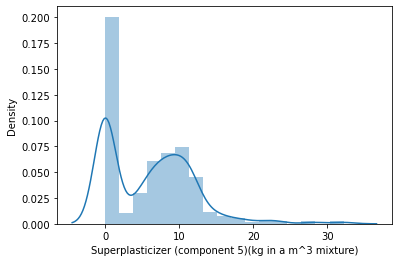

In [21]:
sns.distplot(concrete["Superplasticizer (component 5)(kg in a m^3 mixture)"])

### Observations
* Not showing normal distribution and rightly skewed.

<AxesSubplot:xlabel='Superplasticizer (component 5)(kg in a m^3 mixture)'>

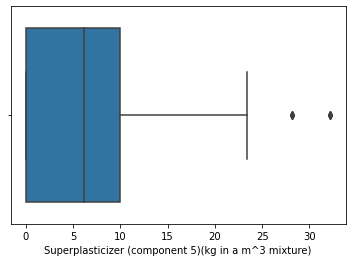

In [22]:
sns.boxplot(concrete["Superplasticizer (component 5)(kg in a m^3 mixture)"])

### Observations
* Rightly skewed and outliers are present in  the higher side of the data.

## Coarse Aggregate

<AxesSubplot:xlabel='Coarse Aggregate  (component 6)(kg in a m^3 mixture)', ylabel='Density'>

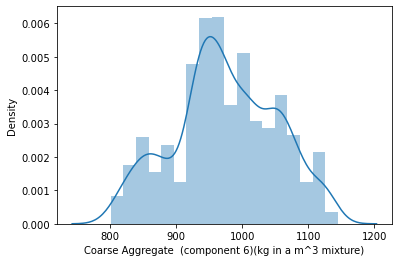

In [23]:
sns.distplot(concrete["Coarse Aggregate  (component 6)(kg in a m^3 mixture)"])

### Observations
* showing slighly noraml distribution. Concentrated towards mean.

<AxesSubplot:xlabel='Coarse Aggregate  (component 6)(kg in a m^3 mixture)'>

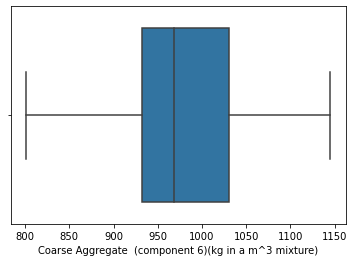

In [24]:
sns.boxplot(concrete["Coarse Aggregate  (component 6)(kg in a m^3 mixture)"])

### Observations
* Outliers are not presnet in the data.

## Fine Aggregate 

<AxesSubplot:xlabel='Fine Aggregate (component 7)(kg in a m^3 mixture)', ylabel='Density'>

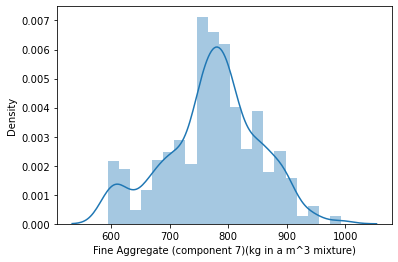

In [25]:
sns.distplot(concrete["Fine Aggregate (component 7)(kg in a m^3 mixture)"])

### Observations
* Showing normal distribution and concentrated towrds mean.

<AxesSubplot:xlabel='Fine Aggregate (component 7)(kg in a m^3 mixture)'>

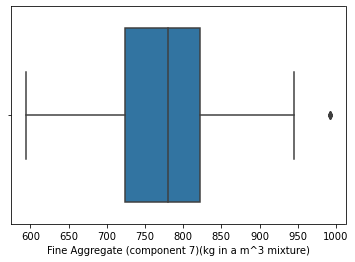

In [26]:
sns.boxplot(concrete["Fine Aggregate (component 7)(kg in a m^3 mixture)"])

### Observations
* Outliers are present in the data.

## Age

<AxesSubplot:xlabel='Age (day)', ylabel='Density'>

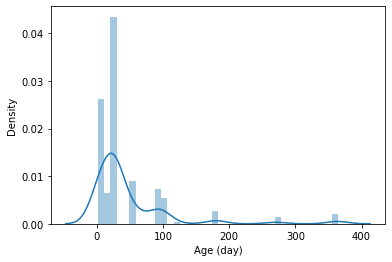

In [27]:
sns.distplot(concrete["Age (day)"])

### Observations
* showing noraml distribution with highly right skewed.

<AxesSubplot:xlabel='Age (day)'>

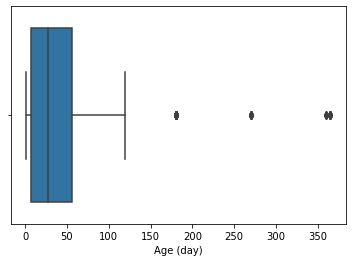

In [28]:
sns.boxplot(concrete["Age (day)"])

### Obseravtions
* There are outliers present in the higher side of the data.

## Concrete compressive strength

<AxesSubplot:xlabel='Concrete compressive strength(MPa, megapascals) ', ylabel='Density'>

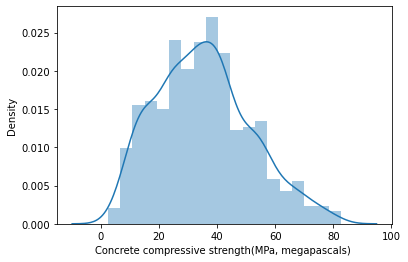

In [29]:
sns.distplot(concrete["Concrete compressive strength(MPa, megapascals) "])

### Observations 
* Showing normal distribution.Concentrated towards mean.

<AxesSubplot:xlabel='Concrete compressive strength(MPa, megapascals) '>

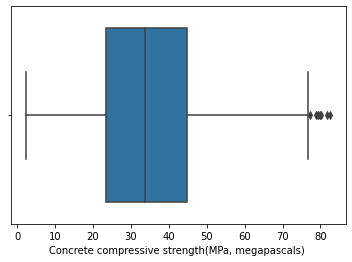

In [30]:
sns.boxplot(concrete["Concrete compressive strength(MPa, megapascals) "])

### Observations 
* Outliers are present in the data.

# Bivariate analysis

In [31]:
concrete.corr()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
Cement (component 1)(kg in a m^3 mixture),1.000000,-0.303324,-0.385610,-0.056625,0.060906,-0.086205,-0.245375,0.086348,0.488283
Blast Furnace Slag (component 2)(kg in a m^3 mixture),-0.303324,1.000000,-0.312352,0.130262,0.019800,-0.277559,-0.289685,-0.042759,0.103374
Fly Ash (component 3)(kg in a m^3 mixture),-0.385610,-0.312352,1.000000,-0.283314,0.414213,-0.026468,0.090262,-0.158940,-0.080648
Water (component 4)(kg in a m^3 mixture),-0.056625,0.130262,-0.283314,1.000000,-0.646946,-0.212480,-0.444915,0.279284,-0.269624
Superplasticizer (component 5)(kg in a m^3 mixture),0.060906,0.019800,0.414213,-0.646946,1.000000,-0.241721,0.207993,-0.194076,0.344209
Coarse Aggregate (component 6)(kg in a m^3 mixture),-0.086205,-0.277559,-0.026468,-0.212480,-0.241721,1.000000,-0.162187,-0.005264,-0.144717
Fine Aggregate (component 7)(kg in a m^3 mixture),-0.245375,-0.289685,0.090262,-0.444915,0.207993,-0.162187,1.000000,-0.156572,-0.186448
Age (day),0.086348,-0.042759,-0.158940,0.279284,-0.194076,-0.005264,-0.156572,1.000000,0.337367
"Concrete compressive strength(MPa, megapascals)",0.488283,0.103374,-0.080648,-0.269624,0.344209,-0.144717,-0.186448,0.337367,1.000000


<AxesSubplot:>

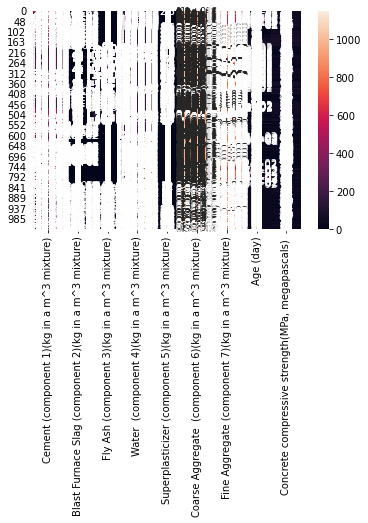

In [32]:
sns.heatmap(concrete, annot = True)

## Cement vs Concrete compressive strength

<AxesSubplot:xlabel='Cement (component 1)(kg in a m^3 mixture)', ylabel='Concrete compressive strength(MPa, megapascals) '>

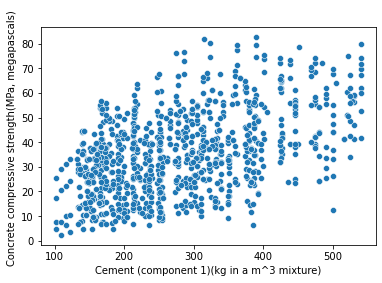

In [33]:
sns.scatterplot(x = concrete["Cement (component 1)(kg in a m^3 mixture)"], y = concrete["Concrete compressive strength(MPa, megapascals) "])

### Observations
* Cement showing strong relationship with Concrete compressive strength, With increase in the cement increase in the concrete strength.

## Blast Furnace Slag vs Concrete compressive strength 

<AxesSubplot:xlabel='Blast Furnace Slag (component 2)(kg in a m^3 mixture)', ylabel='Concrete compressive strength(MPa, megapascals) '>

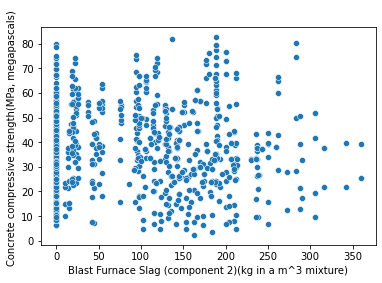

In [34]:
sns.scatterplot(x = concrete["Blast Furnace Slag (component 2)(kg in a m^3 mixture)"], y = concrete["Concrete compressive strength(MPa, megapascals) "])

### Observations
* Both showing very slight showing relation. With increase in the blast furnace slag will not give the strong concrete strength.

## Fly Ash vs Concrete compressive strength

<AxesSubplot:xlabel='Fly Ash (component 3)(kg in a m^3 mixture)', ylabel='Concrete compressive strength(MPa, megapascals) '>

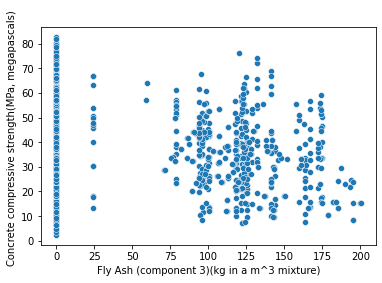

In [35]:
sns.scatterplot(x = concrete["Fly Ash (component 3)(kg in a m^3 mixture)"], y = concrete["Concrete compressive strength(MPa, megapascals) "])

### Observations
* Both are not showing strong relation. With increase in the fly ash will not give the strong concrete strength.

## Water vs Concrete compressive strength

<AxesSubplot:xlabel='Water  (component 4)(kg in a m^3 mixture)', ylabel='Concrete compressive strength(MPa, megapascals) '>

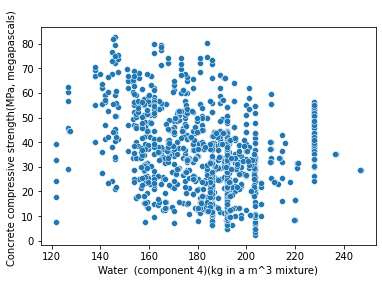

In [36]:
sns.scatterplot(x = concrete["Water  (component 4)(kg in a m^3 mixture)"], y = concrete["Concrete compressive strength(MPa, megapascals) "])

### Observations
* Both are showing some relation but negitively. With increase in the water there may be chance to decrease in the concrete strength.

## Superplasticizer vs Concrete compressive strength

<AxesSubplot:xlabel='Superplasticizer (component 5)(kg in a m^3 mixture)', ylabel='Concrete compressive strength(MPa, megapascals) '>

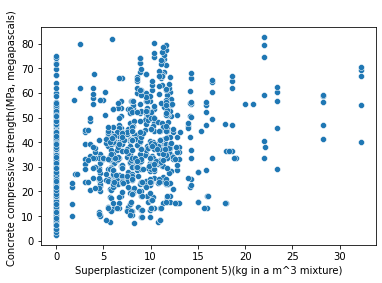

In [37]:
sns.scatterplot(x = concrete["Superplasticizer (component 5)(kg in a m^3 mixture)"], y = concrete["Concrete compressive strength(MPa, megapascals) "])

### Observations
* Both are showing strong relation. With increase in the Superplasticizer there may be chance to increase in the concrete strength.

## Coarse Aggregate vs Concrete compressive strength

<AxesSubplot:xlabel='Coarse Aggregate  (component 6)(kg in a m^3 mixture)', ylabel='Concrete compressive strength(MPa, megapascals) '>

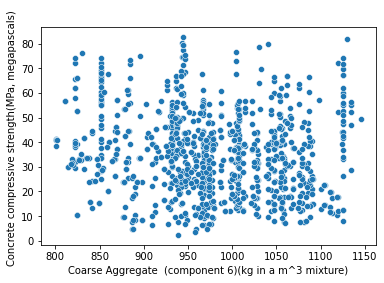

In [38]:
sns.scatterplot(x = concrete["Coarse Aggregate  (component 6)(kg in a m^3 mixture)"], y = concrete["Concrete compressive strength(MPa, megapascals) "])

### Observations
* Both are not showing strong relation. With increase in the Coarse Aggregate doesn not effect the concrete strength.

## Fine Aggregate vs Concrete compressive strength

<AxesSubplot:xlabel='Fine Aggregate (component 7)(kg in a m^3 mixture)', ylabel='Concrete compressive strength(MPa, megapascals) '>

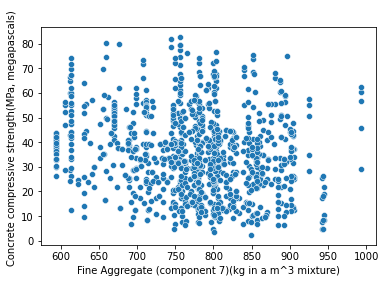

In [39]:
sns.scatterplot(x = concrete['Fine Aggregate (component 7)(kg in a m^3 mixture)'], y = concrete["Concrete compressive strength(MPa, megapascals) "])

### Observations
* Both are not showing strong relation. With increase in the Coarse Aggregate doesn not effect the concrete strength.

## Age (day) vs Concrete compressive strength

<AxesSubplot:xlabel='Age (day)', ylabel='Concrete compressive strength(MPa, megapascals) '>

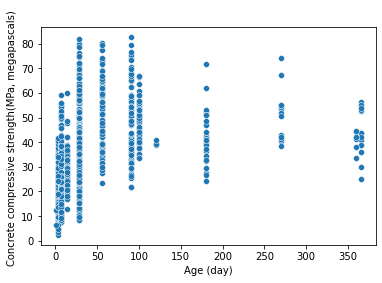

In [40]:
sns.scatterplot(x = concrete['Age (day)'], y = concrete["Concrete compressive strength(MPa, megapascals) "])

### Observations
* Both are showing strong relation. With increase in the age will increase in the the concrete strength.

In [41]:
concrete.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

# Outlier treatment

## Blast Furnace Slag

### using 99 percentile

In [42]:
p99 = np.percentile(concrete['Blast Furnace Slag (component 2)(kg in a m^3 mixture)'], 99)
p99

290.2

In [43]:
print(np.where(concrete['Blast Furnace Slag (component 2)(kg in a m^3 mixture)'] > p99))

(array([529, 535, 539, 547, 559, 560, 621, 674, 675, 696], dtype=int64),)


### Before removing outliers

<AxesSubplot:xlabel='Blast Furnace Slag (component 2)(kg in a m^3 mixture)'>

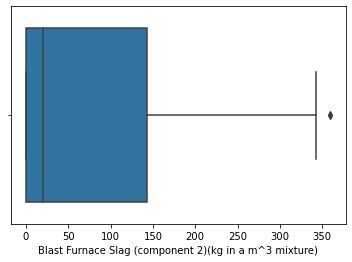

In [44]:
sns.boxplot(concrete['Blast Furnace Slag (component 2)(kg in a m^3 mixture)'])

In [45]:
Q1 = np.percentile(concrete['Blast Furnace Slag (component 2)(kg in a m^3 mixture)'], 25)
Q1

0.0

In [46]:
 
Q3 = np.percentile(concrete['Blast Furnace Slag (component 2)(kg in a m^3 mixture)'], 75)
Q3

142.5

In [47]:
IQR = Q3 - Q1
IQR

142.5

In [48]:
IQR_25 = Q1 - 1.5*IQR
IQR_75 = Q3 + 1.5*IQR

In [49]:
IQR_75

356.25

In [50]:
print(np.where(concrete['Blast Furnace Slag (component 2)(kg in a m^3 mixture)'] > IQR_75))

(array([529, 535], dtype=int64),)


In [51]:
print(np.where(concrete['Blast Furnace Slag (component 2)(kg in a m^3 mixture)'] < (Q1-1.5*IQR)))

(array([], dtype=int64),)


In [52]:
concrete['Blast Furnace Slag (component 2)(kg in a m^3 mixture)'] = concrete['Blast Furnace Slag (component 2)(kg in a m^3 mixture)'].apply(lambda x : Q1-1.5*IQR if x < (Q1-1.5*IQR) else (Q3+1.5*IQR if x>(Q3+1.5*IQR) else x))

<AxesSubplot:xlabel='Blast Furnace Slag (component 2)(kg in a m^3 mixture)'>

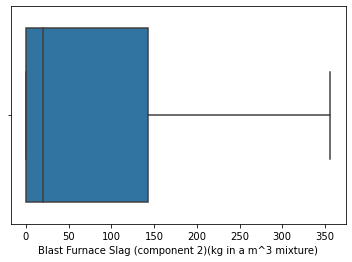

In [53]:
sns.boxplot(concrete['Blast Furnace Slag (component 2)(kg in a m^3 mixture)'])

In [54]:
####################################333333333

In [55]:
# Z score
#removing outliers for entire dataset
from scipy import stats
import numpy as np
 

z_scores = stats.zscore(concrete)

z_scores
abs_z_scores = np.abs(z_scores)
abs_z_scores
abs_z_scores=pd.DataFrame(abs_z_scores)
abs_z_scores
filtered_entries = ((abs_z_scores < 3)|(abs_z_scores > -3)).all(axis=1)
filtered_entries
new_df = concrete[filtered_entries]
new_df


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


<AxesSubplot:>

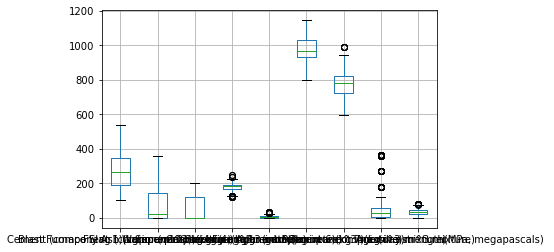

In [56]:
new_df.boxplot()

In [57]:
From Innomatics Research Labs to Everyone 02:16 PM
import sklearn
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
 
# Load the dataset
bos_hou = load_boston()
 
# Create the dataframe
column_name = bos_hou.feature_names
df_boston = pd.DataFrame(bos_hou.data)
df_boston.columns = column_name
df_boston
# Z score
#removing outliers for entire dataset
from scipy import stats
import numpy as np
 

z_scores = stats.zscore(df_boston)

z_scores
abs_z_scores = np.abs(z_scores)
abs_z_scores
abs_z_scores=pd.DataFrame(abs_z_scores)
abs_z_scores
filtered_entries = (abs_z_scores < 3).all(axis=1)
filtered_entries
new_df = df_boston[filtered_entries]
new_df


SyntaxError: invalid syntax (Temp/ipykernel_15288/4247905985.py, line 1)

In [58]:
filtered_entries

0       True
1       True
2       True
3       True
4       True
        ... 
1025    True
1026    True
1027    True
1028    True
1029    True
Length: 1005, dtype: bool

In [59]:
new_df = concrete[filtered_entries == True]

In [60]:
new_df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


<AxesSubplot:>

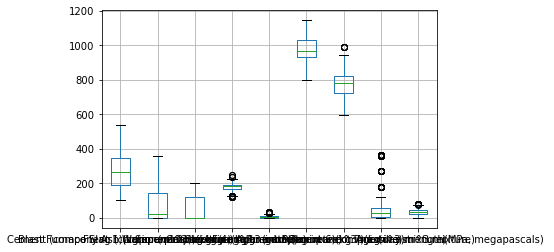

In [61]:
new_df.boxplot()

In [62]:
#######################################################################

### water

In [63]:
concrete.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

### Before removing outliers

<AxesSubplot:xlabel='Water  (component 4)(kg in a m^3 mixture)'>

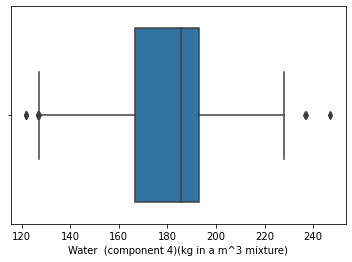

In [64]:
sns.boxplot(concrete["Water  (component 4)(kg in a m^3 mixture)"])

In [65]:
Q1 = np.percentile(concrete["Water  (component 4)(kg in a m^3 mixture)"], 25)
Q3 = np.percentile(concrete["Water  (component 4)(kg in a m^3 mixture)"], 75)
IQR = Q3 - Q1
IQR_25 = Q1 - 1.5*IQR
IQR_75 = Q3 + 1.5*IQR

In [66]:
print(np.where(concrete["Water  (component 4)(kg in a m^3 mixture)"] > IQR_75))
print(np.where(concrete["Water  (component 4)(kg in a m^3 mixture)"] < IQR_25))

(array([837, 848, 911, 994], dtype=int64),)
(array([ 74,  92, 111, 129, 147, 200, 201, 202, 203, 204, 883], dtype=int64),)


In [67]:
concrete["Water  (component 4)(kg in a m^3 mixture)"] = concrete["Water  (component 4)(kg in a m^3 mixture)"].apply(lambda x : Q1-1.5*IQR if x < (Q1-1.5*IQR) else (Q3+1.5*IQR if x>(Q3+1.5*IQR) else x))

## After removing outliers

<AxesSubplot:xlabel='Water  (component 4)(kg in a m^3 mixture)'>

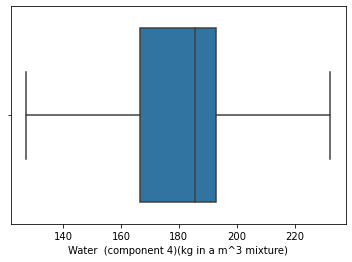

In [68]:
sns.boxplot(concrete["Water  (component 4)(kg in a m^3 mixture)"])

## Superplasticizer 

### Before removing outliers

<AxesSubplot:xlabel='Superplasticizer (component 5)(kg in a m^3 mixture)'>

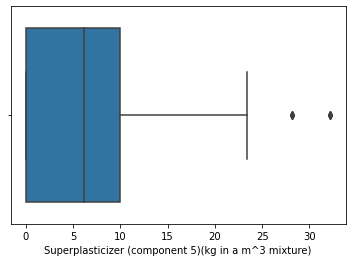

In [69]:
sns.boxplot(concrete['Superplasticizer (component 5)(kg in a m^3 mixture)'])

In [70]:
Q1 = np.percentile(concrete['Superplasticizer (component 5)(kg in a m^3 mixture)'], 25)
Q3 = np.percentile(concrete['Superplasticizer (component 5)(kg in a m^3 mixture)'], 75)
IQR = Q3 - Q1
IQR_25 = Q1 - 1.5*IQR
IQR_75 = Q3 + 1.5*IQR

In [71]:
print(np.where(concrete['Superplasticizer (component 5)(kg in a m^3 mixture)'] > IQR_75))
print(np.where(concrete['Superplasticizer (component 5)(kg in a m^3 mixture)'] < IQR_25))

(array([ 76,  78,  94,  96, 113, 115, 131, 133, 149, 151], dtype=int64),)
(array([], dtype=int64),)


In [72]:
concrete['Superplasticizer (component 5)(kg in a m^3 mixture)'] = concrete['Superplasticizer (component 5)(kg in a m^3 mixture)'].apply(lambda x : Q1-1.5*IQR if x < (Q1-1.5*IQR) else (Q3+1.5*IQR if x>(Q3+1.5*IQR) else x))

### After removing outliers

<AxesSubplot:xlabel='Superplasticizer (component 5)(kg in a m^3 mixture)'>

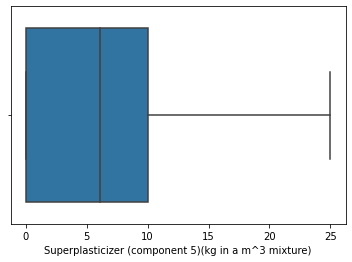

In [73]:
sns.boxplot(concrete['Superplasticizer (component 5)(kg in a m^3 mixture)'])

## Fine Aggregate

### Before removing outliers

<AxesSubplot:xlabel='Fine Aggregate (component 7)(kg in a m^3 mixture)'>

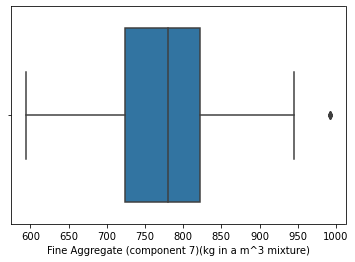

In [74]:
sns.boxplot(concrete['Fine Aggregate (component 7)(kg in a m^3 mixture)'])

In [75]:
Q1 = np.percentile(concrete['Fine Aggregate (component 7)(kg in a m^3 mixture)'], 25)
Q3 = np.percentile(concrete['Fine Aggregate (component 7)(kg in a m^3 mixture)'], 75)
IQR = Q3 - Q1
IQR_25 = Q1 - 1.5*IQR
IQR_75 = Q3 + 1.5*IQR

In [76]:
print(np.where(concrete['Fine Aggregate (component 7)(kg in a m^3 mixture)'] > IQR_75))
print(np.where(concrete['Fine Aggregate (component 7)(kg in a m^3 mixture)'] < IQR_25))

(array([ 74,  92, 111, 129, 147], dtype=int64),)
(array([], dtype=int64),)


In [77]:
concrete['Fine Aggregate (component 7)(kg in a m^3 mixture)'] = concrete['Fine Aggregate (component 7)(kg in a m^3 mixture)'].apply(lambda x : Q1-1.5*IQR if x < (Q1-1.5*IQR) else (Q3+1.5*IQR if x>(Q3+1.5*IQR) else x))

### After remvoing outliers

<AxesSubplot:xlabel='Fine Aggregate (component 7)(kg in a m^3 mixture)'>

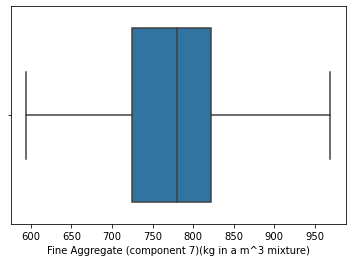

In [78]:
sns.boxplot(concrete['Fine Aggregate (component 7)(kg in a m^3 mixture)'])

## Age 

### Before remvoing outliers

<AxesSubplot:xlabel='Age (day)'>

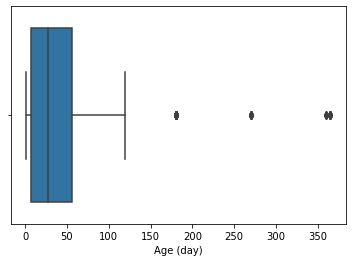

In [79]:
sns.boxplot(concrete["Age (day)"])

In [80]:
Q1 = np.percentile(concrete["Age (day)"], 25)
Q3 = np.percentile(concrete["Age (day)"], 75)
IQR = Q3 - Q1
IQR_25 = Q1 - 1.5*IQR
IQR_75 = Q3 + 1.5*IQR

In [81]:
print(np.where(concrete["Age (day)"] > IQR_75))
print(np.where(concrete["Age (day)"] < IQR_25))

(array([  2,   3,   4,   6,  12,  17,  19,  20,  23,  24,  25,  26,  27,
        30,  31,  32,  33,  34,  35,  39,  41,  42,  43,  47,  50,  51,
        56,  58,  60,  61,  63,  64,  65,  66, 579, 580, 585, 586, 591,
       592, 595, 596, 597, 598, 731, 732, 738, 744, 745, 767, 768, 770,
       771, 773, 774, 788, 789, 795, 798], dtype=int64),)
(array([], dtype=int64),)


In [82]:
concrete["Age (day)"] = concrete["Age (day)"].apply(lambda x : Q1-1.5*IQR if x < (Q1-1.5*IQR) else (Q3+1.5*IQR if x>(Q3+1.5*IQR) else x))

### After remvoing outliers

<AxesSubplot:xlabel='Age (day)'>

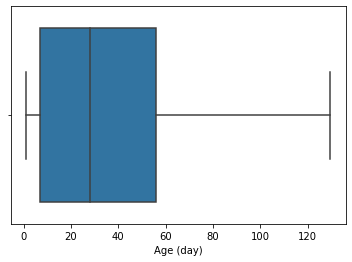

In [83]:
sns.boxplot(concrete["Age (day)"])

## Concrete compressive strength

### Before removing outliers

<AxesSubplot:xlabel='Concrete compressive strength(MPa, megapascals) '>

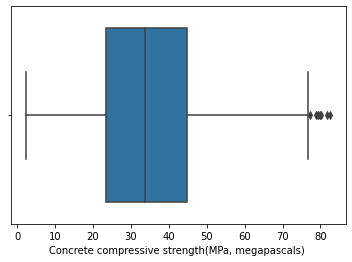

In [84]:
sns.boxplot(concrete["Concrete compressive strength(MPa, megapascals) "])

In [85]:
Q1 = np.percentile(concrete["Concrete compressive strength(MPa, megapascals) "], 25)
Q3 = np.percentile(concrete["Concrete compressive strength(MPa, megapascals) "], 75)
IQR = Q3 - Q1
IQR_25 = Q1 - 1.5*IQR
IQR_75 = Q3 + 1.5*IQR

In [86]:
print(np.where(concrete["Concrete compressive strength(MPa, megapascals) "] > IQR_75))
print(np.where(concrete["Concrete compressive strength(MPa, megapascals) "] < IQR_25))

(array([  0, 136, 137, 141, 154, 158, 357, 359], dtype=int64),)
(array([], dtype=int64),)


In [87]:
concrete["Concrete compressive strength(MPa, megapascals) "] = concrete["Concrete compressive strength(MPa, megapascals) "].apply(lambda x : Q1-1.5*IQR if x < (Q1-1.5*IQR) else (Q3+1.5*IQR if x>(Q3+1.5*IQR) else x))

### After removing outliers

<AxesSubplot:xlabel='Concrete compressive strength(MPa, megapascals) '>

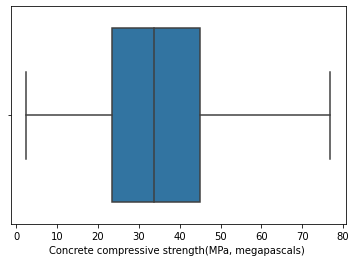

In [88]:
sns.boxplot(concrete["Concrete compressive strength(MPa, megapascals) "])

<AxesSubplot:>

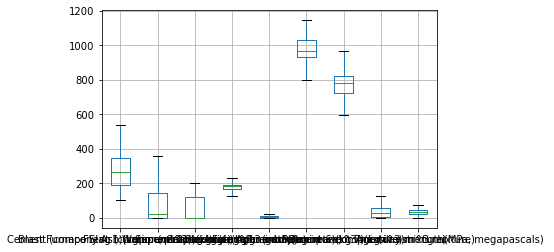

In [89]:
concrete.boxplot()

## Supervised learning

#### Here the target variable is Concrete compressive strength. Because the question to find the concrete compressive strength and it is is given in the data. Target variable is numerical variable, So it is supervised learning, and so it is comes under the regression category.

In [90]:
X = concrete.drop(columns = ["Concrete compressive strength(MPa, megapascals) "])

In [91]:
y = concrete["Concrete compressive strength(MPa, megapascals) "]

## Split the dataset into Training and Testing 


In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Data Preprocessing on Training Data

In [93]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_rescaled = pd.DataFrame(scaler.fit_transform(X_train), 
                                    columns = X_train.columns, 
                                    index = X_train.index)

X_train_rescaled.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
89,1.518361,1.178754,-0.842661,0.198107,0.865806,-1.180445,-0.789460,-0.979187
464,-1.077877,0.020041,1.778774,-0.841158,0.316244,0.403915,-0.020869,1.697690
75,1.861981,0.515004,-0.842661,-0.033366,0.487982,-1.605012,0.119998,-0.979187
832,-1.268777,0.471666,0.554391,0.953936,0.505156,-1.502753,0.706943,-0.289270
685,-1.402407,1.441062,-0.842661,0.481543,-1.040486,-0.630320,0.832982,-0.868801


In [94]:
scaler.var_, scaler.scale_

(array([10976.11982074,  7688.39402368,  4058.39713352,   448.11855583,
           33.90526859,  5968.36345903,  6549.24531196,  1313.06574763]),
 array([104.76697868,  87.68348775,  63.70555026,  21.16881092,
          5.82282308,  77.25518403,  80.92740767,  36.23624908]))

### Preparing Test Data

In [95]:
X_test_rescaled = pd.DataFrame(scaler.transform(X_test), 
                                   columns = X_test.columns, 
                                   index = X_test.index)

X_test_rescaled.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
734,0.659312,-0.839870,-0.842661,0.481543,-1.040486,1.034293,0.459808,1.421724
690,0.077067,1.349824,-0.842661,0.481543,-1.040486,-0.570777,-0.667128,-0.868801
322,-0.294233,-0.839870,0.708224,-1.119870,1.157760,0.151505,1.448348,0.483437
380,1.861981,-0.839870,0.083475,-1.880422,-0.714184,1.577946,-1.616126,-0.289270
595,-0.894613,0.575448,-0.842661,0.183935,-1.040486,1.388962,-0.092539,-0.289270


### Training KNN Regressor

In [96]:
from sklearn.neighbors import KNeighborsRegressor
knn_Regressor = KNeighborsRegressor()
knn_Regressor.fit(X_train_rescaled, y_train)


KNeighborsRegressor()

In [97]:
y_test_pred = knn_Regressor.predict(X_test_rescaled)

In [98]:
# evaluation 
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.754505803938079

### Training Linear Regression

In [99]:
from sklearn.linear_model import LinearRegression
lr_Regressor = LinearRegression()
lr_Regressor.fit(X_train_rescaled, y_train)

LinearRegression()

In [100]:
y_test_pred = lr_Regressor.predict(X_test_rescaled)

In [101]:
r2_score(y_test, y_test_pred)

0.7042481830577779

### Training Decision Tree

In [102]:
from sklearn.tree import DecisionTreeRegressor
dt_Regressor = DecisionTreeRegressor(max_depth = 3)
dt_Regressor.fit(X_train_rescaled, y_train)

DecisionTreeRegressor(max_depth=3)

In [103]:
y_test_pred = dt_Regressor.predict(X_test_rescaled)

In [104]:
r2_score(y_test, y_test_pred)

0.6085875793159363

### Training Support Vector Regressor

In [105]:
from sklearn.svm import SVR
sv_Regressor = SVR()
sv_Regressor.fit(X_train_rescaled, y_train)

SVR()

In [106]:
y_test_pred = sv_Regressor.predict(X_test_rescaled)

In [107]:
r2_score(y_test, y_test_pred)

0.6830762681509992

### Saving the Model (Serialization)

In [109]:
from pickle import dump

dump(scaler, open('models/standard_scaler.pkl', 'wb'))
dump(knn_Regressor, open('models/knn_model.pkl', 'wb'))
dump(lr_Regressor, open('models/lr_model.pkl', 'wb'))
dump(dt_Regressor, open('models/dt_model.pkl', 'wb'))
dump(sv_Regressor, open('models/sv_model.pkl', 'wb'))

### Productionisation (Model Deserialization)

In [111]:
from pickle import load

In [113]:
# Loading pretrained model from pickle file

scaler = load(open('models/standard_scaler.pkl', 'rb'))
knn = load(open('models/knn_model.pkl', 'rb'))
lr = load(open('models/lr_model.pkl', 'rb'))
dt = load(open('models/dt_model.pkl', 'rb'))
sv = load(open('models/sv_model.pkl', 'rb'))


In [114]:
concrete.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,76.895
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.890
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,129.5,40.270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,129.5,41.050
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,129.5,44.300


In [115]:
#### Read the query


print('enter the details:')
cement = float(input('enter cemnet(kg in a m^3 mixture): '))
bfs = float(input('enter Blast Furnace Slag(kg in a m^3 mixture): '))
fa = float(input('enter Fly Ash(kg in a m^3 mixture): '))
Water = float(input('enter Water(kg in a m^3 mixture): '))
Superplasticizer = float(input('enter Superplasticizer(kg in a m^3 mixture): '))
coarse_aggregate = float(input('enter Coarse Aggregate(kg in a m^3 mixture): '))
Fine_Aggregate = float(input('enter Fine Aggregate(kg in a m^3 mixture): '))
age = float(input('enter age(in days): '))

enter the details:
enter cemnet(kg in a m^3 mixture): 540.0	
enter Blast Furnace Slag(kg in a m^3 mixture): 0.0	
enter Fly Ash(kg in a m^3 mixture): 0.0	
enter Water(kg in a m^3 mixture): 162.0	
enter Superplasticizer(kg in a m^3 mixture): 2.5	
enter Coarse Aggregate(kg in a m^3 mixture): 1055.0
enter Fine Aggregate(kg in a m^3 mixture): 676.0
enter age(in days): 28.0


### Converting the values to 2D Array

In [120]:
query_point = np.array([cement,bfs,fa,Water,Superplasticizer,coarse_aggregate,Fine_Aggregate,age])

In [121]:
query_point

array([ 540. ,    0. ,    0. ,  162. ,    2.5, 1055. ,  676. ,   28. ])

In [123]:
query_point = query_point.reshape(1,-1)

In [124]:
query_point_transformed = scaler.transform(query_point)

query_point_transformed

array([[ 2.4824053 , -0.8398696 , -0.84266134, -0.93563631, -0.61114097,
         1.02134913, -1.18363993, -0.28927033]])

In [125]:
knn.predict(query_point_transformed)

array([63.525])

## Production ready code

In [ ]:
### Query data




print('enter the details:')
cement = float(input('enter cemnet(kg in a m^3 mixture): '))
bfs = float(input('enter Blast Furnace Slag(kg in a m^3 mixture): '))
fa = float(input('enter Fly Ash(kg in a m^3 mixture): '))
Water = float(input('enter Water(kg in a m^3 mixture): '))
Superplasticizer = float(input('enter Superplasticizer(kg in a m^3 mixture): '))
coarse_aggregate = float(input('enter Coarse Aggregate(kg in a m^3 mixture): '))
Fine_Aggregate = float(input('enter Fine Aggregate(kg in a m^3 mixture): '))
age = float(input('enter age(in days): '))

query_point = np.array([cement,bfs,fa,Water,Superplasticizer,coarse_aggregate,Fine_Aggregate,age])

query_point = query_point.reshape(1,-1)

query_point_transformed = scaler.transform(query_point)

knn.predict(query_point_transformed)
